# Capstone Project: IBM-Coursera Professional Data Science Specialization

#####      Introduction

This project is designed to answer the question: Is there a Toronto neighbourhood that has a sufficient number of the qualities I love about my own Philadelphia, PA neighborhood - as well as a promising business environment where my firm (BECG, LLC) could be positioned for growth?

This is my project notebook. I have also submitted a report on Github, and have posted this information to my blog.

## 1. Import, install and load.

In [7]:
!pip install geopy

In [8]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
from pandas.io.json import json_normalize

!conda install -c conda-forge geopy --yes

import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be UPDATED:

    ca-certificates: 2019.5.15-0       --> 2019.6.16-hecc5488_0 conda-forge
    certifi:         2019.6.16-py36_0  --> 2019.6.16-py36_1     conda-forge

The following packages will be DOWNGRADED:

    openssl:         1.1.1c-h7b6447c_1 --> 1.1.1c-h516909a_0    conda-forge

Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

# All requested packages already installed.



In [9]:
!conda update folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium


The following packages will be UPDATED:

    openssl:         1.1.1c-h516909a_0    conda-forge --> 1.1.1c-h7b6447c_1

The following packages will be DOWNGRADED:

    ca-certificates: 2019.6.16-hecc5488_0 conda-forge --> 2019.5.15-0      
    certifi:         2019.6.16-py36_1     conda-forge --> 2019.6.16-py36_0 

Preparing transaction: done
Verifying transaction: done
Executing transaction: done


## 2.  Find data from the Web page containing Philadelphia Zip codes, scrape into Jupyter notebook

In [14]:
#Gets the url and scrapes the html 
url = 'http://ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?ClientCode=capitolimpact&State=pa&StName=Pennsylvania&StFIPS=42&FIPS=42101'
req = urllib.request.urlopen(url)


soup = BeautifulSoup(req)

In [15]:
#Finds the table to scrape
table = soup.find('table')

#Provides the empty arrays for the html tags that are being grabbed and assigned to the headings
P = []
C = []

for row in table.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) == 3:
        P.append(cells[0].find(text=True))
        C.append(cells[1].find(text=True))

## 3. Merge Zip code numbers into City data

In [16]:
#Creates the dataframe and places the data in its respective columns
df_phil = pd.DataFrame(P, columns=['PostalCode'])
df_phil['City'] = C
df_phil.head(47)

,PostalCode,City
0,19019,Philadelphia
1,19101,Philadelphia
2,19102,Mid City East
3,19102,Middle City East
4,19102,Philadelphia
5,19103,Mid City West
6,19103,Middle City West
7,19103,Philadelphia
8,19104,Philadelphia
9,19105,Philadelphia


In [17]:
#A specialized function that joins the neighborhoods with the same postalcode
foo = lambda a: ','.join(a) 
df_phil = df_phil.groupby(['PostalCode']).agg({
                                'City': foo}).reset_index()

In [18]:
df_phil.head()

,PostalCode,City
0,19019,Philadelphia
1,19101,Philadelphia
2,19102,"Mid City East,Middle City East,Philadelphia"
3,19103,"Mid City West,Middle City West,Philadelphia"
4,19104,Philadelphia


## 4. Read the csv file containing latitude and longitude for each Zip code.

In [19]:
df_lonlat = pd.read_csv('https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/download/?format=csv&refine.state=PA&q=philadelphia&timezone=America/New_York&use_labels_for_header=true', delimiter=';')
df_lonlat.head(47)


,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,19173,Philadelphia,PA,40.001811,-75.117870,-5,1,"40.001811,-75.11787"
1,19134,Philadelphia,PA,39.991712,-75.111160,-5,1,"39.991712,-75.11116"
2,19115,Philadelphia,PA,40.092610,-75.041180,-5,1,"40.09261,-75.04118"
3,19192,Philadelphia,PA,39.951112,-75.167622,-5,1,"39.951112,-75.167622"
4,19155,Philadelphia,PA,40.001811,-75.117870,-5,1,"40.001811,-75.11787"
5,19183,Philadelphia,PA,40.001811,-75.117870,-5,1,"40.001811,-75.11787"
6,19185,Philadelphia,PA,40.001811,-75.117870,-5,1,"40.001811,-75.11787"
7,19136,Philadelphia,PA,40.041111,-75.026440,-5,1,"40.041111,-75.02644"
8,19109,Philadelphia,PA,39.949612,-75.163722,-5,1,"39.949612,-75.163722"
9,19175,Philadelphia,PA,39.990562,-75.129570,-5,1,"39.990562,-75.12957"


## 4A. Drop unnecessary columns

In [20]:
df_lonlat.drop(['City', 'State', 'Timezone', 'Daylight savings time flag', 'geopoint'], axis=1, inplace=True)
df_lonlat.head()

,Zip,Latitude,Longitude
0,19173,40.001811,-75.117870
1,19134,39.991712,-75.111160
2,19115,40.092610,-75.041180
3,19192,39.951112,-75.167622
4,19155,40.001811,-75.117870


In [21]:
df_lonlat.rename(columns={'Zip':'PostalCode'}, inplace=True)

In [22]:
df_phil.PostalCode = df_phil.PostalCode.astype(int)

## 5. Merge the Zip Code dataframe and the latitude / longitude dataframe.

In [23]:
df_phil = pd.merge(df_phil, df_lonlat, on='PostalCode', how='outer')

## 6. Generate map showing Zip codes.

In [24]:
# create map of Philadelphia using latitude and longitude values
map_phil = folium.Map(location=[39.9524152, -75.1635755], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_phil['Latitude'], df_phil['Longitude'], df_phil['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_phil)  
    
map_phil

If this map does not render properly on Github, you can see it by clicking on [this link](https://github.com/saracw/Coursera---IBM-Capstone-1/blob/master/PhillyClusters1.png). 

### 6A. Scrape data from Web page listing Philadelphia Zip codes.

In [25]:
#Gets the url and scrapes the html 
url1 = 'https://www.zipdatamaps.com/zipcodes-philadelphia-pa'
req1 = urllib.request.urlopen(url1)

soup1 = BeautifulSoup(req1)

### 6B. Load data into dataframe.

In [27]:
table1 = soup1.find('table', class_='table')

Post = []
Pop = []

for row in table1.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) == 8:
        Post.append(cells[0].find(text=True))
        Pop.append(cells[5].find(text=True))

In [28]:
df_pop = pd.DataFrame(Post, columns=['PostalCode'])
df_pop['Population'] = Pop

In [29]:
df_pop.PostalCode = df_pop.PostalCode.astype(int)

### 6C. Merge the Zip code, latitude, and longitude dataframes with population dataframe.

In [30]:
df_merged = pd.merge(df_phil, df_pop, on='PostalCode', how='outer')

In [ ]:
%%debug
cols = [2, 3, 4, 5, ]
df_merged.drop(df_merged.columns[cols], axis=0, inplace=True)

In [32]:
df_merged = df_merged.dropna()

In [67]:
df_merged.head(47)

,PostalCode,City,Latitude,Longitude,Population
2,19102,"Mid City East,Middle City East,Philadelphia",39.952962,-75.16558,Philadelphia
3,19103,"Mid City West,Middle City West,Philadelphia",39.952162,-75.17406,Philadelphia
4,19104,Philadelphia,39.961612,-75.19957,Philadelphia
6,19106,Philadelphia,39.951062,-75.14589,Philadelphia
7,19107,Philadelphia,39.952112,-75.15853,Philadelphia
11,19111,Philadelphia,40.057661,-75.08018,Philadelphia
12,19112,Philadelphia,39.895677,-75.19044,Philadelphia
13,19114,Philadelphia,40.064257,-75.00155,Philadelphia
14,19115,Philadelphia,40.092610,-75.04118,Philadelphia
15,19116,Philadelphia,40.117413,-75.01540,Philadelphia


## 7. Submit Foursquare credentials

In [1]:
# @hidden_cell
# define Foursquare Credentials and Version
CLIENT_ID = 'YOUR FOURSQUARE ID' # your Foursquare ID
CLIENT_SECRET = 'YOUR FOURSQUARE SECRET' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YOUR FOURSQUARE ID
CLIENT_SECRET:YOUR FOURSQUARE SECRET


In [69]:
first_nei = df_merged['PostalCode'][16]
first_nei

19118

## 8.  We look at all Philadelphia Zip codes, using 19118 (Chestnut Hill) as a reference point.

In [70]:
first_nei_lat = df_merged.loc[16,'Latitude']
first_nei_lon = df_merged.loc[16,'Longitude']
print('Latitude and longitude values of {} are {}, {}.'.format(first_nei, 
                                                               first_nei_lat, 
                                                               first_nei_lon))


Latitude and longitude values of 19118 are 40.072359999999996, -75.20772.


In [71]:
radius = 500 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    first_nei_lat, 
    first_nei_lon, 
    radius, 
    LIMIT)

In [72]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d30f7efbcbf7a0039809b1e'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Chestnut Hill',
  'headerFullLocation': 'Chestnut Hill, Philadelphia',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 47,
  'suggestedBounds': {'ne': {'lat': 40.0768600045, 'lng': -75.20185040460325},
   'sw': {'lat': 40.067859995499994, 'lng': -75.21358959539674}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b8ee0e0f964a5204a3c33e3',
       'name': 'Pastorius Park',
       'location': {'address': 'Lincoln Dr',
        'lat': 40.070748284050914,
        'lng': -75.20506381988525,
        'labeledLatLngs': [{'

In [73]:
results['response']['groups'][0]['items'][0]['venue']['categories'][0]['name']

'Park'

In [74]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['reasons.count', 'reasons.items', 'referralId', 'venue.categories',
       'venue.delivery.id', 'venue.delivery.provider.icon.name',
       'venue.delivery.provider.icon.prefix',
       'venue.delivery.provider.icon.sizes', 'venue.delivery.provider.name',
       'venue.delivery.url', 'venue.id', 'venue.location.address',
       'venue.location.cc', 'venue.location.city', 'venue.location.country',
       'venue.location.crossStreet', 'venue.location.distance',
       'venue.location.formattedAddress', 'venue.location.labeledLatLngs',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.neighborhood', 'venue.location.postalCode',
       'venue.location.state', 'venue.name', 'venue.photos.count',
       'venue.photos.groups', 'venue.venuePage.id'],
      dtype='object')

## 9.  Next, we gather information about the venues in Zip Code 19118 from Foursquare.

In [75]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [76]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]
nearby_venues

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Pastorius Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",40.070748,-75.205064
1,Weavers Way Co-Op Chestnut Hill,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",40.075489,-75.205659
2,Iron Hill Brewery & Restaurant,"[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",40.075210,-75.205261
3,The Fresh Market,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",40.073300,-75.203366
4,El Poquito,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",40.073596,-75.202887
5,Campbell's Place,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",40.075084,-75.204779
6,Bredenbeck's Bakery,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",40.072672,-75.202324
7,Cake,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",40.076269,-75.206327
8,Bredenbeck's Ice Cream,"[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",40.072744,-75.202386
9,Chestnut Hill Grill,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",40.074060,-75.203110


In [77]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Pastorius Park,Park,40.070748,-75.205064
1,Weavers Way Co-Op Chestnut Hill,Grocery Store,40.075489,-75.205659
2,Iron Hill Brewery & Restaurant,Brewery,40.075210,-75.205261
3,The Fresh Market,Grocery Store,40.073300,-75.203366
4,El Poquito,Mexican Restaurant,40.073596,-75.202887
5,Campbell's Place,American Restaurant,40.075084,-75.204779
6,Bredenbeck's Bakery,Bakery,40.072672,-75.202324
7,Cake,Bakery,40.076269,-75.206327
8,Bredenbeck's Ice Cream,Ice Cream Shop,40.072744,-75.202386
9,Chestnut Hill Grill,American Restaurant,40.074060,-75.203110


## 10. We retrieve lists of venues in each Philadelphia Zip code.

In [78]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['PostalCode', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [79]:
phil_venues = getNearbyVenues(names = df_merged['PostalCode'],
                                   latitudes = df_merged['Latitude'],
                                   longitudes = df_merged['Longitude']
                                  )

19102
19103
19104
19106
19107
19111
19112
19114
19115
19116
19118
19119
19120
19121
19122
19123
19124
19125
19126
19127
19128
19129
19130
19131
19132
19133
19134
19135
19136
19137
19138
19139
19140
19141
19142
19143
19144
19145
19146
19147
19148
19149
19150
19151
19152
19153
19154


In [80]:
print(phil_venues.shape)
phil_venues.head(47)

(1158, 7)


,PostalCode,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,19102,39.952962,-75.16558,Dilworth Park,39.952772,-75.164723,Park
1,19102,39.952962,-75.16558,La Colombe Coffee Roasters,39.951659,-75.165238,Coffee Shop
2,19102,39.952962,-75.16558,City Hall Courtyard,39.952484,-75.163592,Plaza
3,19102,39.952962,-75.16558,One Liberty Observation Deck,39.952740,-75.168068,Scenic Lookout
4,19102,39.952962,-75.16558,JFK Plaza / Love Park,39.954123,-75.165303,Plaza
5,19102,39.952962,-75.16558,"The Ritz-Carlton, Philadelphia",39.951446,-75.164149,Hotel
6,19102,39.952962,-75.16558,sweetgreen,39.953115,-75.167258,Salad Place
7,19102,39.952962,-75.16558,UNIQLO,39.951426,-75.167634,Clothing Store
8,19102,39.952962,-75.16558,Del Frisco's Double Eagle Steak House,39.950795,-75.165389,Steakhouse
9,19102,39.952962,-75.16558,R2L,39.951714,-75.167485,American Restaurant


In [81]:
phil_venues.groupby('PostalCode').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
PostalCode,,,,,,
19102,100,100,100,100,100,100
19103,100,100,100,100,100,100
19104,15,15,15,15,15,15
19106,100,100,100,100,100,100
19107,100,100,100,100,100,100
19111,14,14,14,14,14,14
19112,1,1,1,1,1,1
19114,6,6,6,6,6,6
19115,3,3,3,3,3,3


In [82]:
print('There are {} unique categories.'.format(len(phil_venues['Venue Category'].unique())))

There are 221 unique categories.


In [83]:
phil_onehot = pd.get_dummies(phil_venues[['Venue Category']], prefix="", prefix_sep="")

phil_onehot['PostalCode'] = phil_venues['PostalCode'] 

fixed_columns = [phil_onehot.columns[-1]] + list(phil_onehot.columns[:-1])
phil_onehot = phil_onehot[fixed_columns]
phil_onehot.head(47)

,PostalCode,African Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,19102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,19102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,19102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,19102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,19102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,19102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,19102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,19102,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
phil_grouped = phil_onehot.groupby('PostalCode').mean().reset_index()
phil_grouped

,PostalCode,African Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,19102,0.0,0.040000,0.000000,0.01,0.010000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.030000,0.000000
1,19103,0.0,0.060000,0.000000,0.00,0.000000,0.0000,0.010000,0.000000,0.000000,...,0.000000,0.000000,0.010000,0.01,0.01,0.000000,0.000000,0.01,0.020000,0.000000
2,19104,0.0,0.000000,0.066667,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000
3,19106,0.0,0.040000,0.020000,0.00,0.000000,0.0000,0.010000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000
4,19107,0.0,0.010000,0.010000,0.00,0.000000,0.0000,0.010000,0.000000,0.000000,...,0.010000,0.000000,0.010000,0.00,0.01,0.010000,0.000000,0.00,0.000000,0.000000
5,19111,0.0,0.000000,0.000000,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000
6,19112,0.0,0.000000,0.000000,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000
7,19114,0.0,0.000000,0.000000,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000
8,19115,0.0,0.000000,0.000000,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000
9,19116,0.0,0.000000,0.000000,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000


In [85]:
phil_grouped.PostalCode = phil_grouped.PostalCode.astype(str)

## 11. Identify the most common venues for each Zip code.

In [86]:
num_top_venues = 5
for code in phil_grouped['PostalCode']:
    print("----"+code+"----")
    temp = phil_grouped[phil_grouped['PostalCode'] == code].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----19102----
                 venue  freq
0          Coffee Shop  0.07
1                Hotel  0.06
2  American Restaurant  0.04
3          Salad Place  0.04
4   Italian Restaurant  0.03


----19103----
                           venue  freq
0            American Restaurant  0.06
1                    Coffee Shop  0.05
2                  Deli / Bodega  0.04
3  Vegetarian / Vegan Restaurant  0.03
4        New American Restaurant  0.03


----19104----
                  venue  freq
0      Toy / Game Store  0.07
1             Piano Bar  0.07
2      Greek Restaurant  0.07
3  Caribbean Restaurant  0.07
4     Mobile Phone Shop  0.07


----19106----
                 venue  freq
0       History Museum  0.08
1        Historic Site  0.06
2          Coffee Shop  0.05
3  American Restaurant  0.04
4             Boutique  0.04


----19107----
                venue  freq
0              Bakery  0.06
1      Sandwich Place  0.05
2        Burger Joint  0.03
3  Chinese Restaurant  0.03
4               Hote

In [87]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [88]:
phil_grouped.PostalCode = phil_grouped.PostalCode.astype(int)

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['PostalCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['PostalCode'] = phil_grouped['PostalCode']

for ind in np.arange(phil_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(phil_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,19102,Coffee Shop,Hotel,Salad Place,American Restaurant,Cosmetics Shop,Italian Restaurant,Yoga Studio,Seafood Restaurant,Plaza,Pub
1,19103,American Restaurant,Coffee Shop,Deli / Bodega,Bar,New American Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Bookstore,Spa,Cosmetics Shop
2,19104,Deli / Bodega,Caribbean Restaurant,Coffee Shop,Chinese Restaurant,Greek Restaurant,Toy / Game Store,Cosmetics Shop,Gym / Fitness Center,Pizza Place,Mobile Phone Shop
3,19106,History Museum,Historic Site,Coffee Shop,American Restaurant,Boutique,Italian Restaurant,New American Restaurant,Hotel,Bar,Gastropub
4,19107,Bakery,Sandwich Place,Chinese Restaurant,Hotel,Burger Joint,Bubble Tea Shop,Snack Place,Ice Cream Shop,Shanghai Restaurant,Pub
5,19111,Deli / Bodega,Baseball Field,Convenience Store,Bus Station,Snack Place,Chinese Restaurant,Sandwich Place,Park,Coffee Shop,Pizza Place
6,19112,Food Truck,Event Space,Food Court,Food & Drink Shop,Food,Flower Shop,Fish Market,Filipino Restaurant,Field,Fast Food Restaurant
7,19114,Golf Course,Sporting Goods Shop,Discount Store,Donut Shop,Gym / Fitness Center,Fabric Shop,Food Court,Food & Drink Shop,Food,Flower Shop
8,19115,Pool,Italian Restaurant,Construction & Landscaping,Ethiopian Restaurant,Food & Drink Shop,Food,Flower Shop,Fish Market,Filipino Restaurant,Field
9,19116,Chinese Restaurant,Beer Garden,Bank,Flower Shop,Caucasian Restaurant,Liquor Store,Spanish Restaurant,Grocery Store,Spa,Donut Shop


## 12.  Identify clusters within the data.

In [89]:
from sklearn.cluster import KMeans

kclusters = 5

phil_grouped_clustering = phil_grouped.drop('PostalCode', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(phil_grouped_clustering)

kmeans.labels_

array([2, 2, 2, 2, 2, 2, 1, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 3], dtype=int32)

In [90]:
phil_merged = df_merged[0:47]

phil_merged['Cluster Labels'] = kmeans.labels_

phil_merged = phil_merged.join(neighborhoods_venues_sorted.set_index('PostalCode'), on='PostalCode')

phil_merged.head(47)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,PostalCode,City,Latitude,Longitude,Population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,19102,"Mid City East,Middle City East,Philadelphia",39.952962,-75.16558,Philadelphia,2,Coffee Shop,Hotel,Salad Place,American Restaurant,Cosmetics Shop,Italian Restaurant,Yoga Studio,Seafood Restaurant,Plaza,Pub
3,19103,"Mid City West,Middle City West,Philadelphia",39.952162,-75.17406,Philadelphia,2,American Restaurant,Coffee Shop,Deli / Bodega,Bar,New American Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Bookstore,Spa,Cosmetics Shop
4,19104,Philadelphia,39.961612,-75.19957,Philadelphia,2,Deli / Bodega,Caribbean Restaurant,Coffee Shop,Chinese Restaurant,Greek Restaurant,Toy / Game Store,Cosmetics Shop,Gym / Fitness Center,Pizza Place,Mobile Phone Shop
6,19106,Philadelphia,39.951062,-75.14589,Philadelphia,2,History Museum,Historic Site,Coffee Shop,American Restaurant,Boutique,Italian Restaurant,New American Restaurant,Hotel,Bar,Gastropub
7,19107,Philadelphia,39.952112,-75.15853,Philadelphia,2,Bakery,Sandwich Place,Chinese Restaurant,Hotel,Burger Joint,Bubble Tea Shop,Snack Place,Ice Cream Shop,Shanghai Restaurant,Pub
11,19111,Philadelphia,40.057661,-75.08018,Philadelphia,2,Deli / Bodega,Baseball Field,Convenience Store,Bus Station,Snack Place,Chinese Restaurant,Sandwich Place,Park,Coffee Shop,Pizza Place
12,19112,Philadelphia,39.895677,-75.19044,Philadelphia,1,Food Truck,Event Space,Food Court,Food & Drink Shop,Food,Flower Shop,Fish Market,Filipino Restaurant,Field,Fast Food Restaurant
13,19114,Philadelphia,40.064257,-75.00155,Philadelphia,2,Golf Course,Sporting Goods Shop,Discount Store,Donut Shop,Gym / Fitness Center,Fabric Shop,Food Court,Food & Drink Shop,Food,Flower Shop
14,19115,Philadelphia,40.092610,-75.04118,Philadelphia,4,Pool,Italian Restaurant,Construction & Landscaping,Ethiopian Restaurant,Food & Drink Shop,Food,Flower Shop,Fish Market,Filipino Restaurant,Field
15,19116,Philadelphia,40.117413,-75.01540,Philadelphia,2,Chinese Restaurant,Beer Garden,Bank,Flower Shop,Caucasian Restaurant,Liquor Store,Spanish Restaurant,Grocery Store,Spa,Donut Shop


## 13. Generate map with clusters superimposed. 

In [91]:
map_clusters = folium.Map(location=[39.9524152, -75.1635755], zoom_start=11)

x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)

markers_colors = []
for lat, lon, nei , cluster in zip(phil_merged['Latitude'], phil_merged['Longitude'], phil_merged['PostalCode'], phil_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#00b5eb', '#80ffb4', '#ffb360', '#ff0000']


You can see the map by clicking on [this link](https://github.com/saracw/Coursera---IBM-Capstone-1/blob/master/PhillyClusters2.png).

In [92]:
phil_merged.loc[phil_merged['Cluster Labels'] == 0, phil_merged.columns[[0] + list(range(5, phil_merged.shape[1]))]]

,PostalCode,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,19125,0,Bar,Pizza Place,Art Gallery,Café,Dive Bar,Beer Garden,Southern / Soul Food Restaurant,Market,Sandwich Place,Liquor Store
27,19129,0,Gym / Fitness Center,Pub,Massage Studio,Café,Food & Drink Shop,Rock Climbing Spot,Dessert Shop,Fabric Shop,Food,Flower Shop
46,19148,0,Mexican Restaurant,Liquor Store,Pizza Place,Park,Chinese Restaurant,Seafood Restaurant,Grocery Store,Bar,Bakery,Cambodian Restaurant


In [93]:
phil_merged.loc[phil_merged['Cluster Labels'] == 1, phil_merged.columns[[0] + list(range(5, phil_merged.shape[1]))]]

,PostalCode,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,19112,1,Food Truck,Event Space,Food Court,Food & Drink Shop,Food,Flower Shop,Fish Market,Filipino Restaurant,Field,Fast Food Restaurant


In [94]:
phil_merged.loc[phil_merged['Cluster Labels'] == 2, phil_merged.columns[[0] + list(range(5, phil_merged.shape[1]))]]

,PostalCode,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,19102,2,Coffee Shop,Hotel,Salad Place,American Restaurant,Cosmetics Shop,Italian Restaurant,Yoga Studio,Seafood Restaurant,Plaza,Pub
3,19103,2,American Restaurant,Coffee Shop,Deli / Bodega,Bar,New American Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Bookstore,Spa,Cosmetics Shop
4,19104,2,Deli / Bodega,Caribbean Restaurant,Coffee Shop,Chinese Restaurant,Greek Restaurant,Toy / Game Store,Cosmetics Shop,Gym / Fitness Center,Pizza Place,Mobile Phone Shop
6,19106,2,History Museum,Historic Site,Coffee Shop,American Restaurant,Boutique,Italian Restaurant,New American Restaurant,Hotel,Bar,Gastropub
7,19107,2,Bakery,Sandwich Place,Chinese Restaurant,Hotel,Burger Joint,Bubble Tea Shop,Snack Place,Ice Cream Shop,Shanghai Restaurant,Pub
11,19111,2,Deli / Bodega,Baseball Field,Convenience Store,Bus Station,Snack Place,Chinese Restaurant,Sandwich Place,Park,Coffee Shop,Pizza Place
13,19114,2,Golf Course,Sporting Goods Shop,Discount Store,Donut Shop,Gym / Fitness Center,Fabric Shop,Food Court,Food & Drink Shop,Food,Flower Shop
15,19116,2,Chinese Restaurant,Beer Garden,Bank,Flower Shop,Caucasian Restaurant,Liquor Store,Spanish Restaurant,Grocery Store,Spa,Donut Shop
16,19118,2,American Restaurant,Grocery Store,Ice Cream Shop,Clothing Store,Market,Bank,Train Station,Bakery,Brewery,Seafood Restaurant
17,19119,2,Pizza Place,Pharmacy,Chinese Restaurant,Train Station,Gym,Playground,Rental Car Location,Event Space,Moving Target,Fish Market


In [95]:
phil_merged.loc[phil_merged['Cluster Labels'] == 3, phil_merged.columns[[0] + list(range(5, phil_merged.shape[1]))]]

,PostalCode,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
52,19154,3,Pizza Place,Deli / Bodega,Convenience Store,Pharmacy,Event Space,Food & Drink Shop,Food,Flower Shop,Fish Market,Filipino Restaurant


In [96]:
phil_merged.loc[phil_merged['Cluster Labels'] == 4, phil_merged.columns[[0] + list(range(5, phil_merged.shape[1]))]]

,PostalCode,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,19115,4,Pool,Italian Restaurant,Construction & Landscaping,Ethiopian Restaurant,Food & Drink Shop,Food,Flower Shop,Fish Market,Filipino Restaurant,Field


## 14. Overview of results

As you can see, above, I was able to cluster Philadelphia's Zip codes using k-means clustering. However, what you might not know if you are unfamiliar with this city, is that there the clustering does not yield great insights. This is, in part, because Zip codes exist for the sole purpose of facilitating delivery of the mail. Below, you will see a Zip code map of Philadelphia, with the clusters color coded to indicate whether they fall into cluster(s) 0, 1, 2, 3, or 4. 

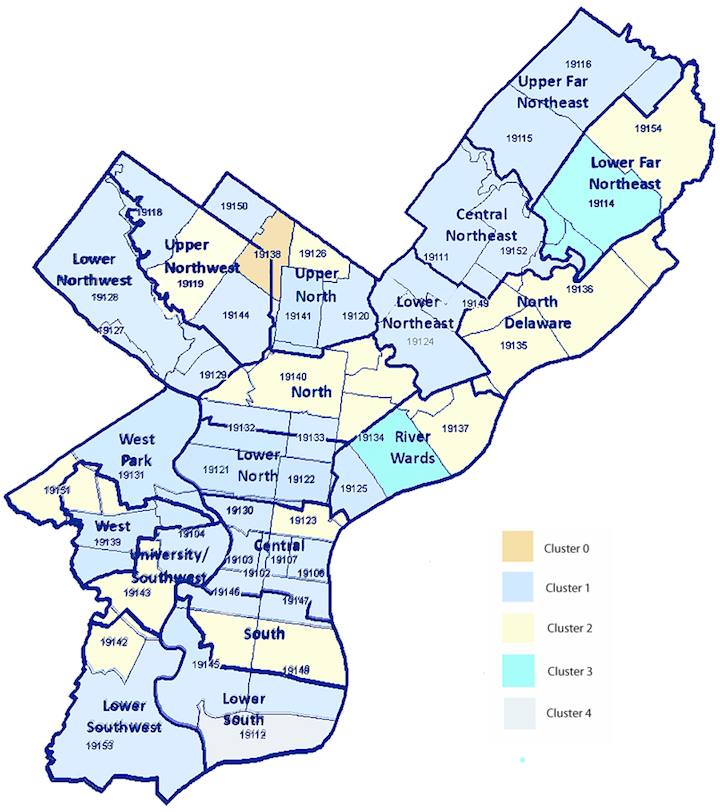

If the map does not render on Github, just click on [this link](https://github.com/saracw/Coursera---IBM-Capstone-1/blob/master/philazips2.png) to see it.

## 15. Discussion

>The primary purpose of this exercise was to determine whether we were able to use what we learned during the course of this Specialization, independently and without any Lab to provide explicit instructions. In that, this project was successful. I was able to run code that produced a coherent result. I also got to learn more about my own Philadelphia neighborhood, since that was the topic upon which I chose to focus. 

>Still, I set out to answer another question, which was "If I were to move to Toronto, is there a neighborhood that is similar to mine, in a location that would also be within walking distance to and area that could support a growing Consulting/Data Science business? The characteristics of such a location would include mixed residential and commercial use, in a neighborhood that is roughly as old as my own (founded before 1800), with trees and good places to go (again, on foot) as well as large business's headquarters and growing tech investment.

>In both cases, I used Foursquare data to assess the number and type of venues in both cities. However, Foursquare was developed to help people pick somewhere to go, based on their wishes and their location. It was not designed to help people make momentous life decisions. That said, venues matter - and sometimes they can tell you something about a neighborhood that you might like or really not like. I found this to be the case when I first collected a list of all the venues in my neighborhood (Philadelphia's Chestnut Hill, Zip code 19118) and the Foursquare Toronto data, parsed by Zip code, latitude and longitude. Please see the spreadsheets I downloaded from my Jupyter notebook, below. 

In [97]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_956b1639be4e4261b6195120965e82e4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='KxwGJCkXCxDqMYElNdYMwFO1iAOhP2IyaLqjubvpZg3i',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_956b1639be4e4261b6195120965e82e4.get_object(Bucket='neighborhoodsampcitiesphiladelphi-donotdelete-pr-46wtikf2skx3m1',Key='CHillvenues.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head(46)

,Venue Number,Venue Name,Venue Category,Zip Code,Neighborhood,Latitude,Longitude
0,5,Campbell's Place,American Restaurant,19118,Chestnut Hill,40.075084,-75.204779
1,9,Chestnut Hill Grill,American Restaurant,19118,Chestnut Hill,40.074060,-75.203110
2,25,Mica,American - Fusion Restaurant,19118,Chestnut Hill,40.076777,-75.207634
3,16,Ten Thousand Villages - Chestnut Hill,Arts & Crafts Store,19118,Chestnut Hill,40.075044,-75.204678
4,6,Bredenbeck's Bakery,Bakery,19118,Chestnut Hill,40.072672,-75.202324
5,7,Cake,Bakery,19118,Chestnut Hill,40.076269,-75.206327
6,24,TD Bank,Bank,19118,Chestnut Hill,40.076596,-75.207772
7,29,Wells Fargo,Bank,19118,Chestnut Hill,40.076703,-75.206928
8,34,Artisans on the Avenue,Boutique,19118,Chestnut Hill,40.075755,-75.206156
9,2,Iron Hill Brewery & Restaurant,Brewery,19118,Chestnut Hill,40.075210,-75.205261


## Toronto Venues

## 16. Implications and Conclusions

>Relocation analysis is serious business, and this data collection/analysis process is a good beginning. Going forward, I plan to use it as a jumping off point for looking at neighborhoods, using units of measurement (e.g., the Census block group that are more stable and are linked with larger data sets like the Economic Census, as well as differences in governance, etc. - which are a function of differences between Canada and the US. One thing I know and like very much is Canada's approach to immigration (in other words, it is good for society, the economy, the wellbeing of all and should be encouraged).

>Still, I did find a partial answer to my question of where I would want to live/work if I moved to Toronto. "Old Toronto" looks very attractive to me for so many reasons - not the least of which is the presence of the University nearby. Thriving educational institutions are essential to a good economy - especially if the type of work one does is cognitive in nature, as is the case for me. This is a pretty large area and includes a broad variety of neighborhoods. 

>One of the analyses I conducted was to look at the mix of venues in my own neighbourhood, then sort the Toronto data to see which among the neighbourhoods covered in our class's work was most similar to my own. One thing I noticed: Chestnut Hill likes food, and parks! There are several ice cream parlours and bakeries a farmer's market, and two of the three grocery stores are organic. There are numerous parks, one of which is among the largest in the US, and there are two light commuter rail lines. Among the Toronto Postal Codes covered by our analysis of Foursquare venues, the Toronto neighbourhoods called Rosedale and Moore Park seem to have the qualities I would seek. Yes, more research is required, but Data Science has given me more and better tools. This is just the beginning.

## Thank you for your time and interest!